Problem Statement:

Predict the salary of an individual based on their demographic and professional characteristics, such as age, gender, education level, job title, and years of experience.

Problem Type:

This is a regression problem, where the goal is to predict a continuous outcome variable (salary) based on a set of input features.


Target Variable:

The target variable is Salary, which is a continuous variable.

Feature Variables:

The feature variables are:

Age: A continuous variable representing the individual's age.
Gender: A categorical variable representing the individual's gender (Male/Female).
Education Level: A categorical variable representing the individual's education level (High School, Bachelor's, Master's, PhD).
Job Title: A categorical variable representing the individual's job title (e.g., Software Engineer, Data Analyst, Senior Manager).
Years of Experience: A continuous variable representing the individual's years of experience.


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


# Data Preprocessing # 
* Encode Categorical Variables: Convert categorical features into numerical values using LabelEncoder.
* Handle Missing Values: Drop rows with missing values.

In [3]:
label_encoders = {}
categorical_columns = ['Gender', 'Education Level', 'Job Title']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Store label encoder for future use

df = df.dropna(axis=0)

#  Feature and Target Selection

In [4]:
X = df.drop(columns='Salary')
y = df['Salary']

# Split Data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=21, test_size=0.2)

# Model Initialization and Training

In [6]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)  # Fit the model on training data

RandomForestRegressor(random_state=42)

# Predictions and Evaluation

In [7]:
y_pred_rf = rf.predict(x_test)
print("\nRandom Forest Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
Mean Squared Error: 53681574.62516548
R² Score: 0.9803012540433674


# Prediction On Dataset

In [8]:
predictions = rf.predict(x_test)

results = pd.DataFrame({
    'Actual Salary': y_test,
    'Predicted Salary': predictions
})

print(results)

      Actual Salary  Predicted Salary
1813        55000.0      50499.290517
4227       225000.0     224950.000000
4156        26000.0      26861.090647
4637        70000.0      70000.000000
6348        40000.0      39715.000000
...             ...               ...
1572       190000.0     190000.000000
3437        45000.0      46660.000000
518         95000.0      90660.761905
719        150000.0     149050.000000
4109       120000.0     120000.000000

[1340 rows x 2 columns]


# Evaluation Metrics

In [9]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 2850.607049597861
Mean Squared Error (MSE): 53681574.62516548
Root Mean Squared Error (RMSE): 7326.7710913584215
R-squared (R²): 0.9803012540433674


#  Prepare Sample Input Data

In [10]:
sample_input_data = pd.DataFrame({
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Education Level': ["Bachelor's", "Master's", "PhD", "Bachelor's", "Master's"],
    'Job Title': ['Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director'],
    'Age': [32, 28, 45, 36, 52],
    'Years of Experience': [5, 3, 15, 7, 20]
})

# Encode Sample Input Data

In [11]:
for column in ['Gender', 'Education Level', 'Job Title']:
    sample_input_data[column] = label_encoders[column].transform(sample_input_data[column])

# Prediction On Sample Input Data

In [12]:
sample_input_data = sample_input_data[X.columns].copy()

sample_predictions = rf.predict(sample_input_data)

sample_input_data['Predicted Salary'] = sample_predictions
print("Predictions on Sample Input Data:")
print(sample_input_data[['Gender', 'Education Level', 'Job Title', 'Age', 'Years of Experience', 'Predicted Salary']])

Predictions on Sample Input Data:
   Gender  Education Level  Job Title  Age  Years of Experience  \
0       1                0        177   32                    5   
1       0                3         18   28                    3   
2       1                5        145   45                   15   
3       0                0        116   36                    7   
4       1                3         26   52                   20   

   Predicted Salary  
0     116767.128427  
1      88411.501832  
2     154750.000000  
3      72260.000000  
4     186361.230000  


In [13]:
import pandas as pd

# Actual salary data
actual_data = pd.DataFrame({
    'Age': [32.0, 28.0, 45.0, 36.0, 52.0],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Education Level': ["Bachelor's", "Master's", "PhD", "Bachelor's", "Master's"],
    'Job Title': ['Software Engineer', 'Data Analyst', 'Senior Manager', 'Sales Associate', 'Director'],
    'Years of Experience': [5.0, 3.0, 15.0, 7.0, 20.0],
    'Actual Salary': [90000.0, 65000.0, 150000.0, 60000.0, 200000.0]
})

predicted_data = pd.DataFrame({
    'Predicted Salary': [116767.128427, 88411.501832, 154750.000000, 72260.000000, 186361.230000]
})

combined_data = pd.concat([actual_data, predicted_data], axis=1)

print(combined_data)

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

   Actual Salary  Predicted Salary  
0        90000.0     116767.128427  
1        65000.0      88411.501832  
2       150000.0     154750.000000  
3        60000.0      72260.000000  
4       200000.0     186361.230000  


In [14]:
combined_data['Absolute Error'] = abs(combined_data['Actual Salary'] - combined_data['Predicted Salary'])
mae = combined_data['Absolute Error'].mean()
mse = ((combined_data['Actual Salary'] - combined_data['Predicted Salary']) ** 2).mean()
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 16165.480051799997
Mean Squared Error (MSE): 324692745.8740301
Root Mean Squared Error (RMSE): 18019.23266607183


# Data Visualation

This helps understand which features are most influential in predicting salary.

* **Visualization:** A bar plot showing the importance of each feature.
* **Purpose:** Shows how much each feature contributes to the prediction.

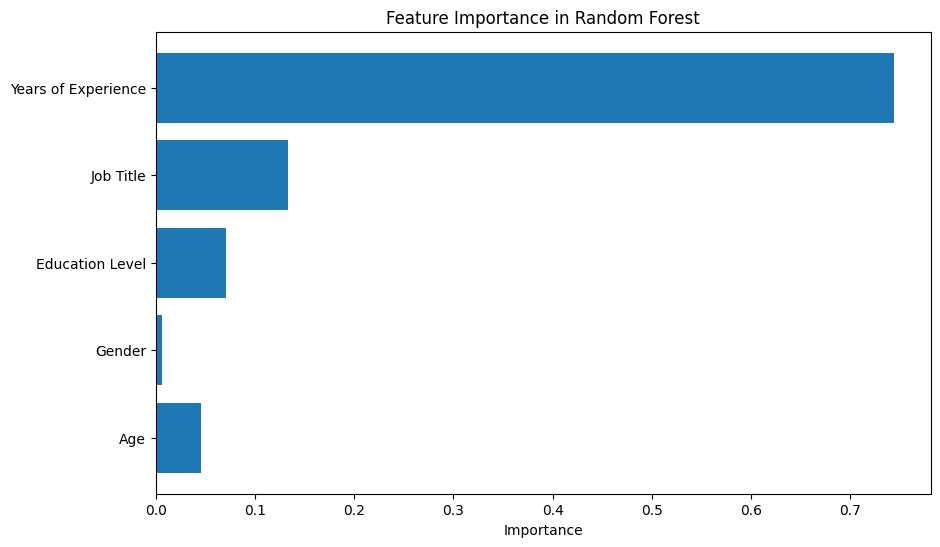

In [15]:
feature_importance = rf.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

Visualization: A scatter plot to compare actual vs predicted salaries.
Purpose: This plot helps to visually inspect how close the predictions are to the actual values. Ideally, points should lie close to the diagonal line (y=x).

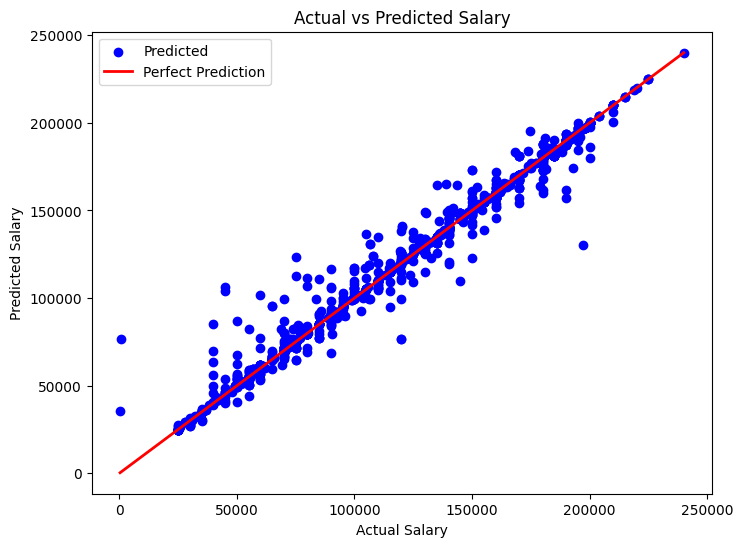

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()


Visualization: A residuals plot that shows the difference between actual and predicted values.
Purpose: To understand how well the model performs across the range of salary values. A well-performing model will have residuals scattered randomly around zero.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


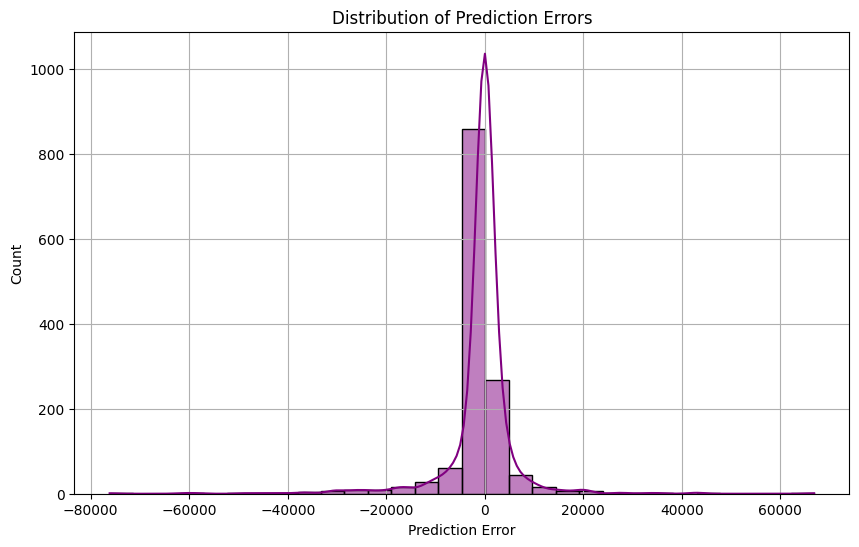

In [17]:
# Plotting the distribution of errors
errors = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='purple')
plt.xlabel('Prediction Error')
plt.title('Distribution of Prediction Errors')
plt.grid()
plt.show()

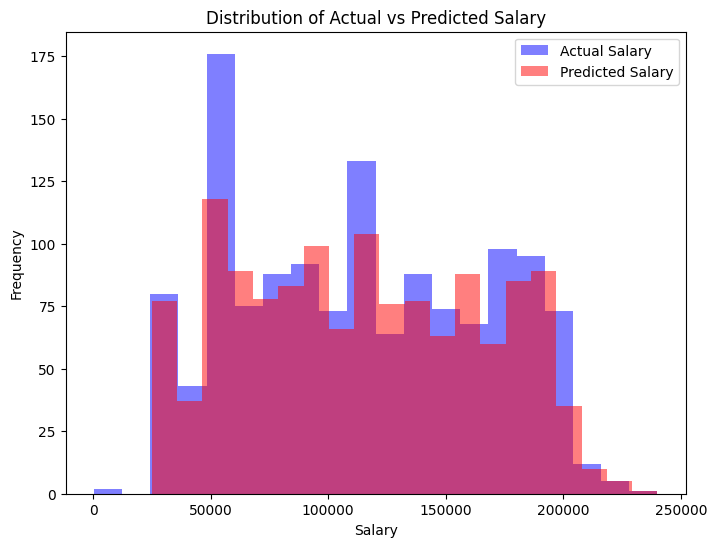

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Actual Salary', color='blue')
plt.hist(y_pred_rf, bins=20, alpha=0.5, label='Predicted Salary', color='red')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted Salary')
plt.legend()
plt.show()


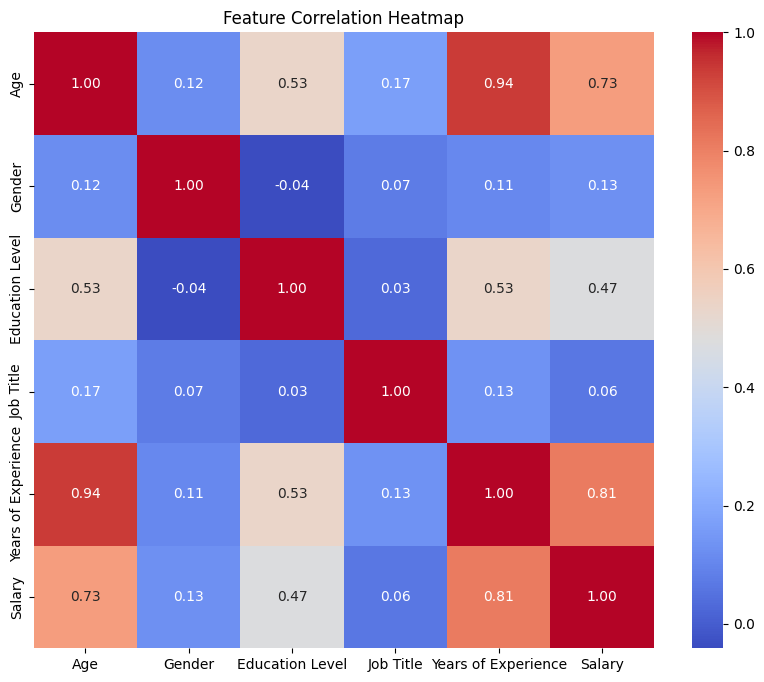

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

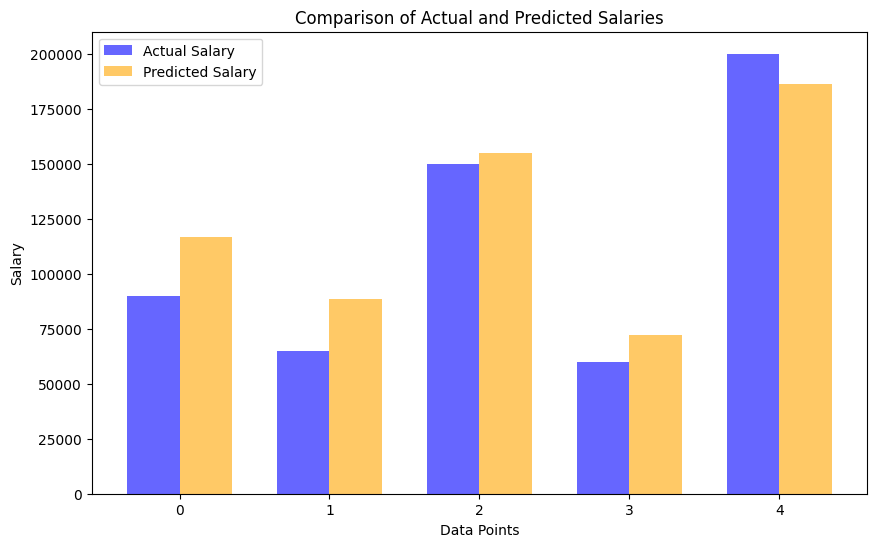

In [20]:
# Bar plot for Actual vs Predicted Salary
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(combined_data))

plt.bar(index, combined_data['Actual Salary'], bar_width, label='Actual Salary', color='blue', alpha=0.6)
plt.bar(index + bar_width, combined_data['Predicted Salary'], bar_width, label='Predicted Salary', color='orange', alpha=0.6)

plt.xlabel('Data Points')
plt.ylabel('Salary')
plt.title('Comparison of Actual and Predicted Salaries')
plt.xticks(index + bar_width / 2, range(len(combined_data)))
plt.legend()
plt.show()
